In [7]:
library(datasets)
library(graphics)
library(grDevices)
#library(lme4)
#library(lmerTest)
#library(car)
#library(carData)
#library(multcomp)
#library(lsmeans)
library(MASS)
library(ggplot2)
library(methods)
library(Matrix)
#library(multcomp)
#library(mvtnorm)
library(stats)
library(survival)
#library(TH.data)
library(utils)
library(readr)
#library(WRS2)

In [93]:
#data = read_csv('AA2_Avoid_Motor_Final_28_subjcts.csv')

In [106]:
#colnames(data)

In [70]:
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==1]<-'good learners'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==2]<-'stable intermediate'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==3]<-'stable hyperavoiders'
#data$Avoidance_clusters[data$Cluster_hierarc_method_complet==4]<-'stable hypo-avoiders'

data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==1]<- 'stable SuperHyperAvoiders'
#data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==2]<-'stable Hyperavoiders'
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==3]<-'good learners'
#data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==4]<- 'delayed learners' 
data$Avoidance_clusters[data$Cluster_avoid_cutoff_55==5]<-'stable hypo-avoiders'

Warning message:
“Unknown or uninitialised column: 'Avoidance_clusters'.”

# MENTAL DISORDER

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  21.52  10.762   2.724 0.0959 .
Residuals               16  63.21   3.951                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

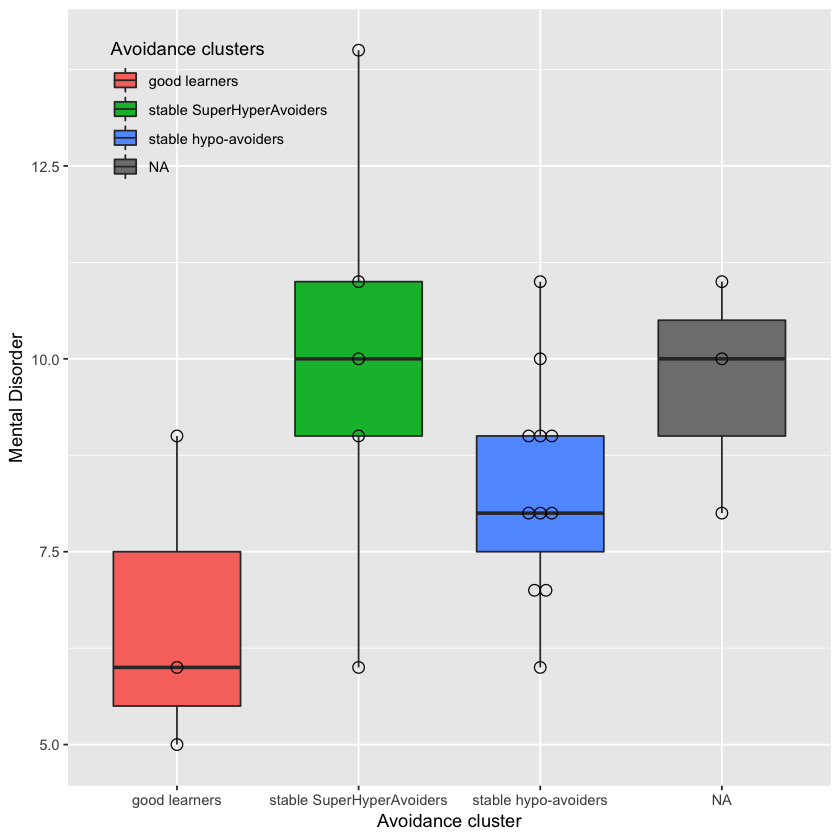

In [127]:
summary(aov(data$MentalDis ~ data$Avoidance_clusters))
MentalDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, MentalDis,
                                    fill=Avoidance_clusters))
MentalDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Mental Disorder") + 
    theme(legend.position=c(0.2,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

# ANXIETY

## State anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   77.1   38.56   1.242  0.308
Residuals               22  683.1   31.05               
3 observations deleted due to missingness

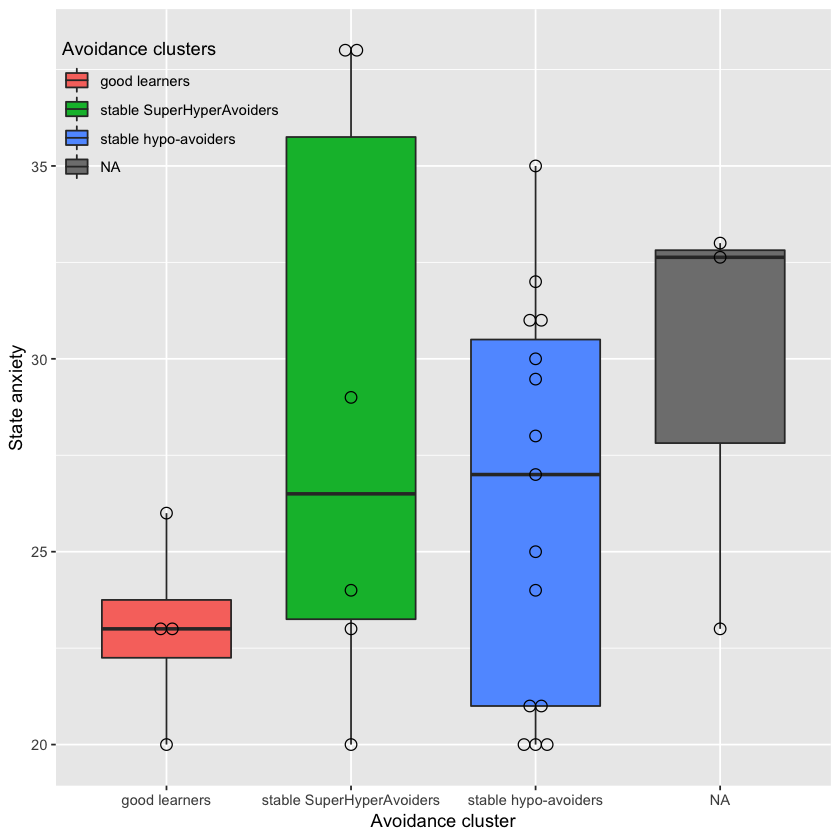

In [75]:
summary(aov(data$STAI_S ~ data$Avoidance_clusters))
StaiSBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_S,
                                    fill=Avoidance_clusters))
StaiSBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="State anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Trait anxiety

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   49.1   24.57     0.8  0.462
Residuals               22  675.4   30.70               
3 observations deleted due to missingness

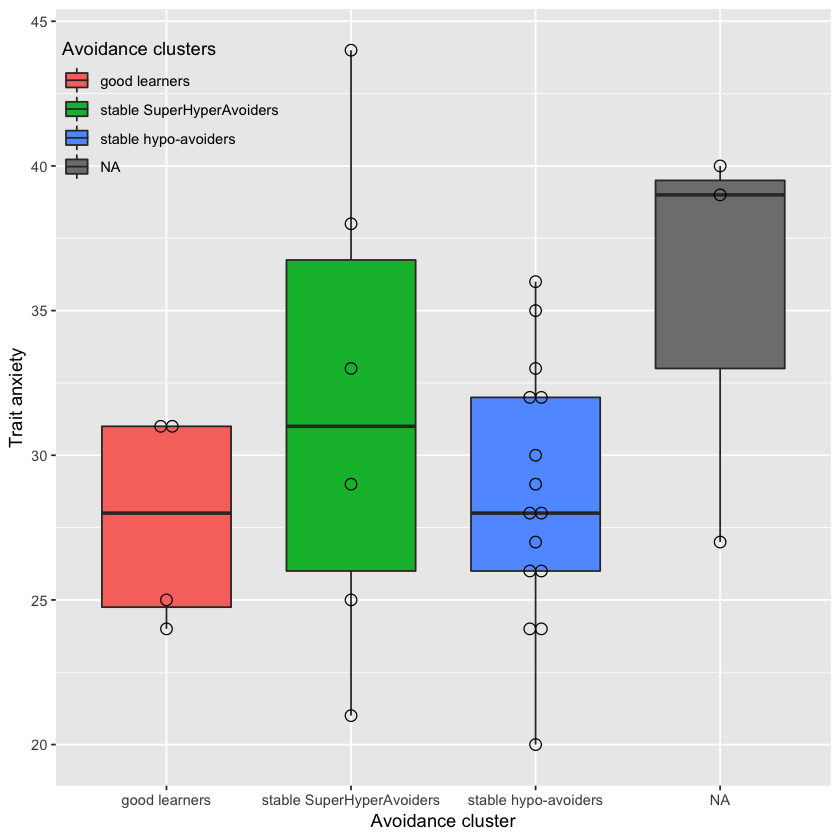

In [79]:
summary(aov(data$STAI_T ~ data$Avoidance_clusters))
StaiTBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, STAI_T,
                                    fill=Avoidance_clusters))
StaiTBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.4, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Trait anxiety") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

# COPING STYLES

## Acceptance coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   8.88   4.439   0.332  0.722
Residuals               16 213.65  13.353               
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

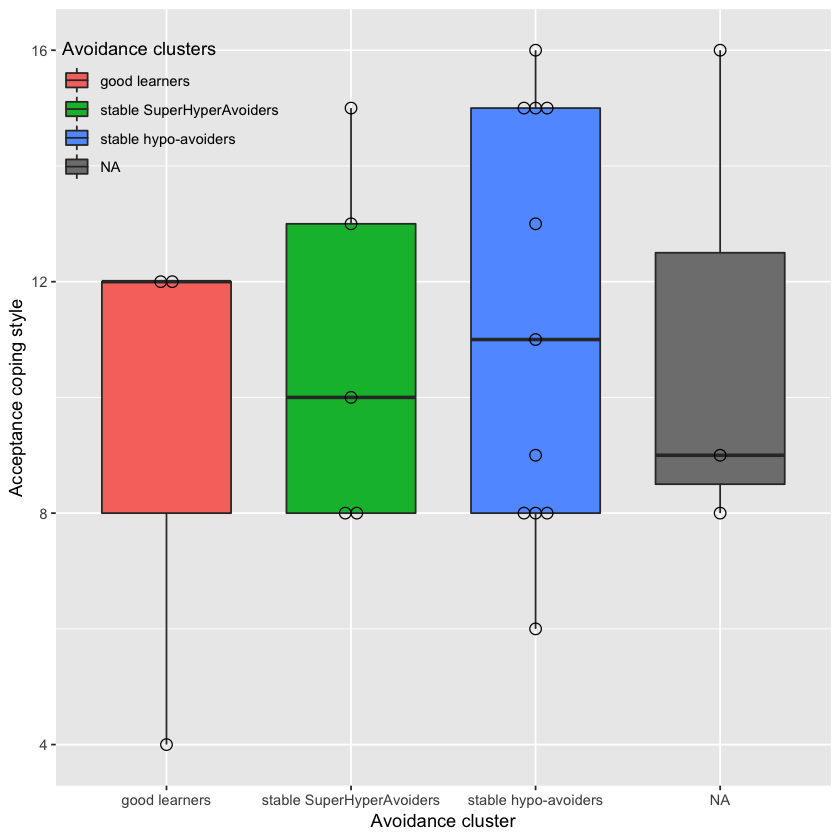

In [80]:
summary(aov(data$Accept ~ data$Avoidance_clusters))
AcceptBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Accept,
                                    fill=Avoidance_clusters))
AcceptBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.2, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Acceptance coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Active coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  23.91  11.956   4.141 0.0355 *
Residuals               16  46.19   2.887                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

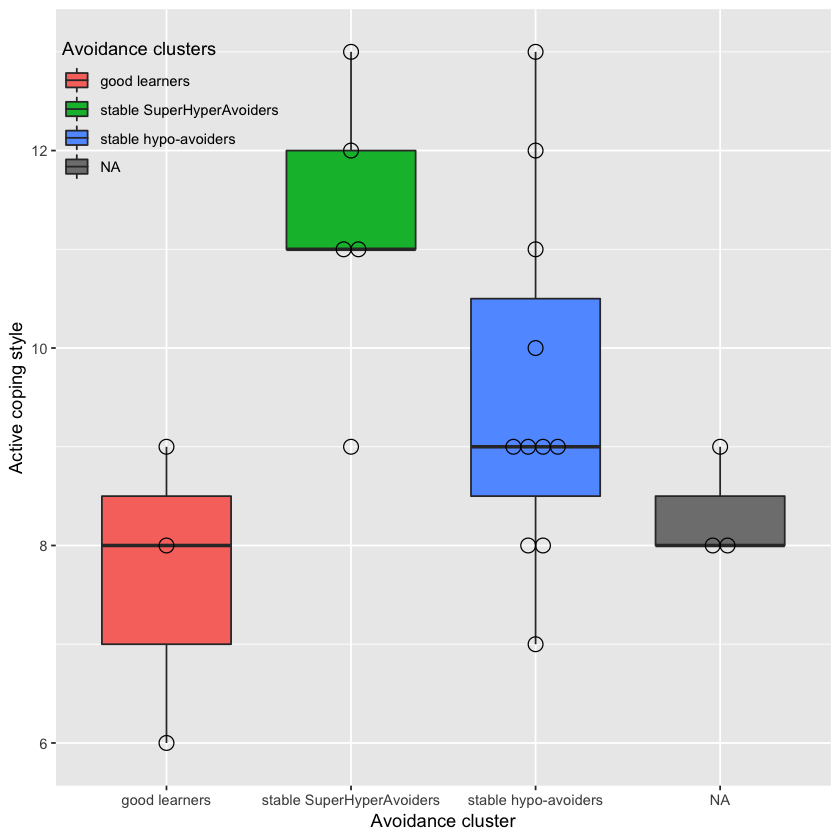

In [81]:
summary(aov(data$Active ~ data$Avoidance_clusters))
ActiveBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Active,
                                    fill=Avoidance_clusters))
ActiveBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Active coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Denial coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   0.91  0.4542   0.187  0.831
Residuals               16  38.78  2.4235               
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

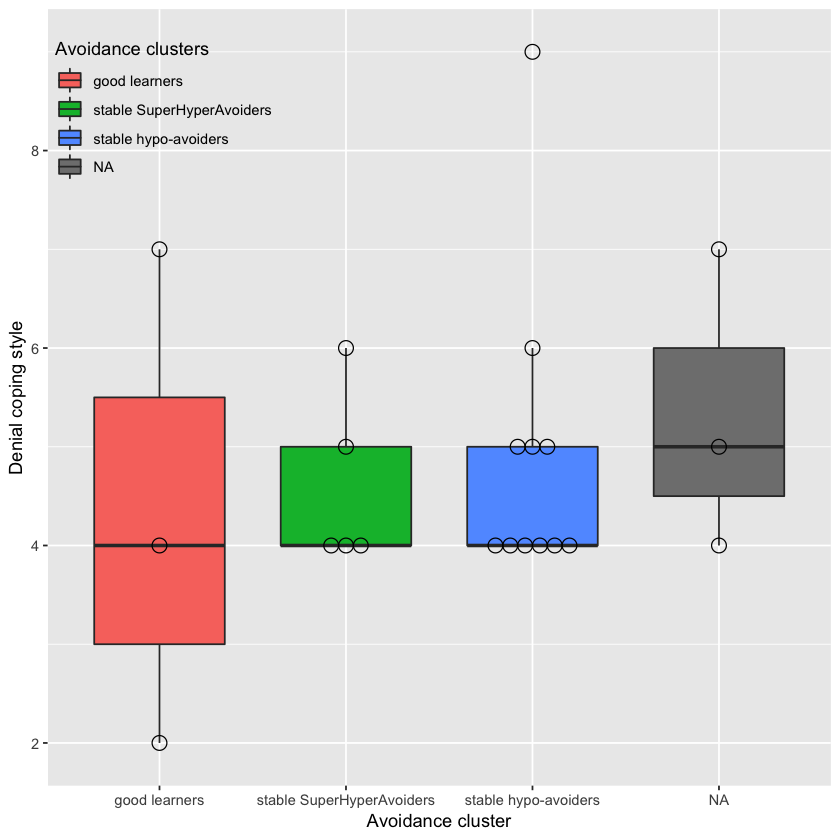

In [82]:
summary(aov(data$Denial ~ data$Avoidance_clusters))
DenialBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Denial,
                                    fill=Avoidance_clusters))
DenialBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.15, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Denial coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Religious coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  85.76   42.88   2.666    0.1
Residuals               16 257.39   16.09               
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

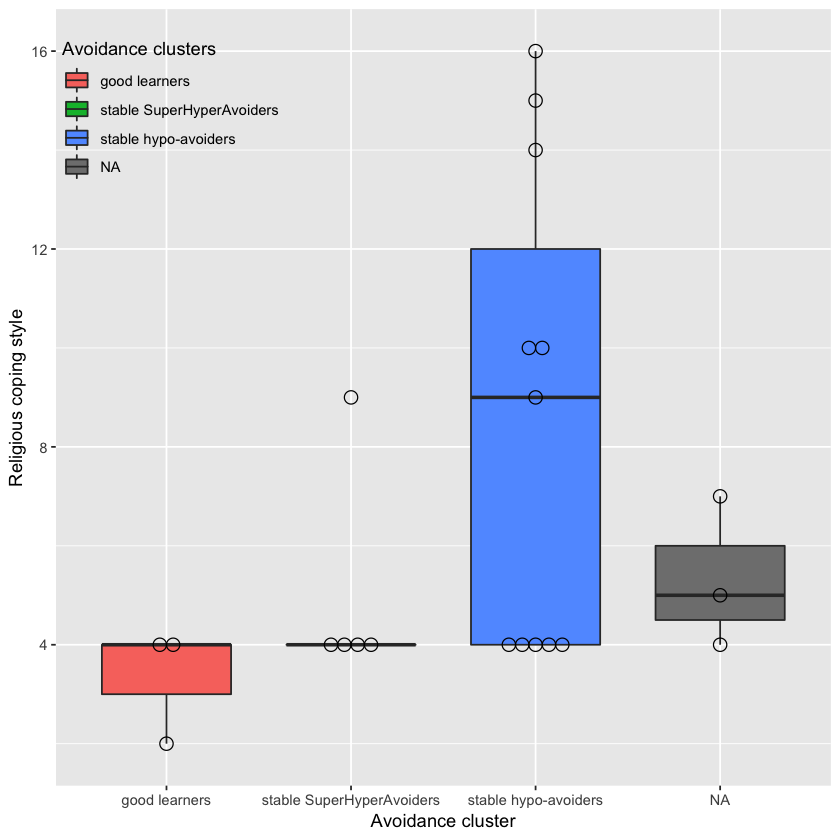

In [84]:
summary(aov(data$Religious ~ data$Avoidance_clusters))
ReligiousBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Religious,
                                    fill=Avoidance_clusters))
ReligiousBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.27, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Religious coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Humor coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  92.94   46.47   4.478 0.0285 *
Residuals               16 166.01   10.38                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

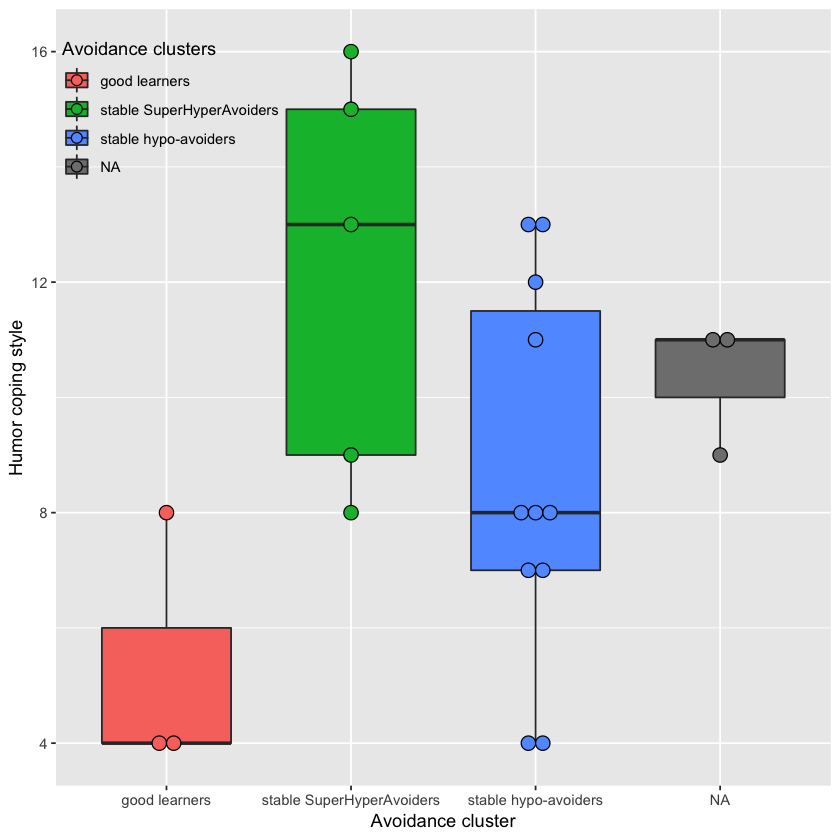

In [85]:
summary(aov(data$Humor ~ data$Avoidance_clusters))
HumorBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Humor,
                                    fill=Avoidance_clusters))
HumorBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center") +
    labs(x="Avoidance cluster", y="Humor coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Suppression of competing activities coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  42.58  21.291   3.823 0.0439 *
Residuals               16  89.10   5.569                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

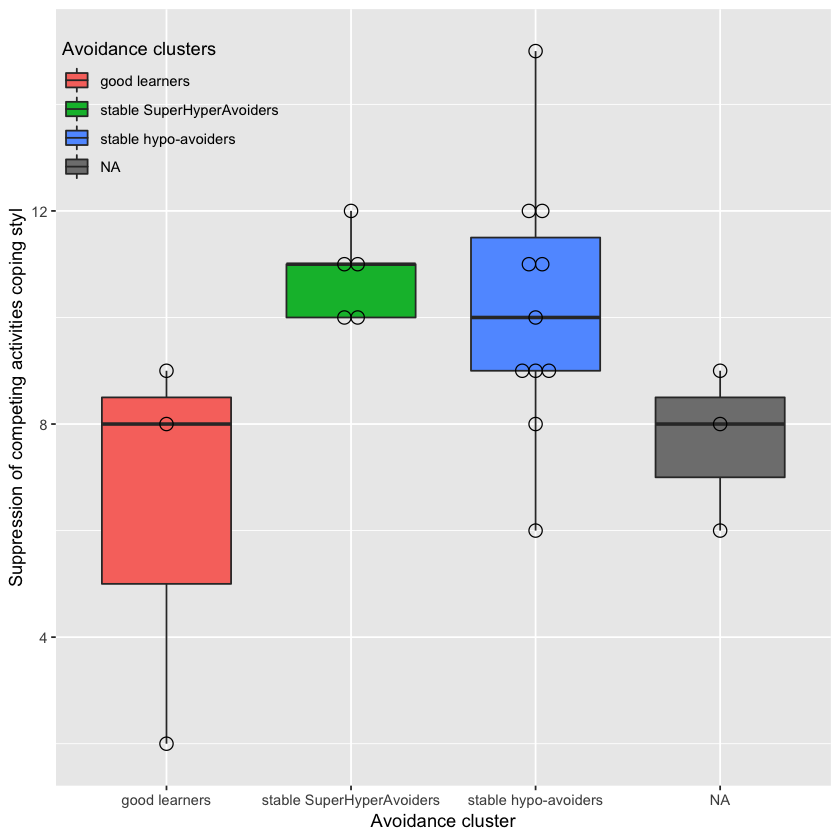

In [86]:
summary(aov(data$Suppress ~ data$Avoidance_clusters))
SuppressBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Suppress,
                                    fill=Avoidance_clusters))
SuppressBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Suppression of competing activities coping styl") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Behavioral disengagement coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2   2.43   1.217   0.359  0.704
Residuals               16  54.30   3.394               
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

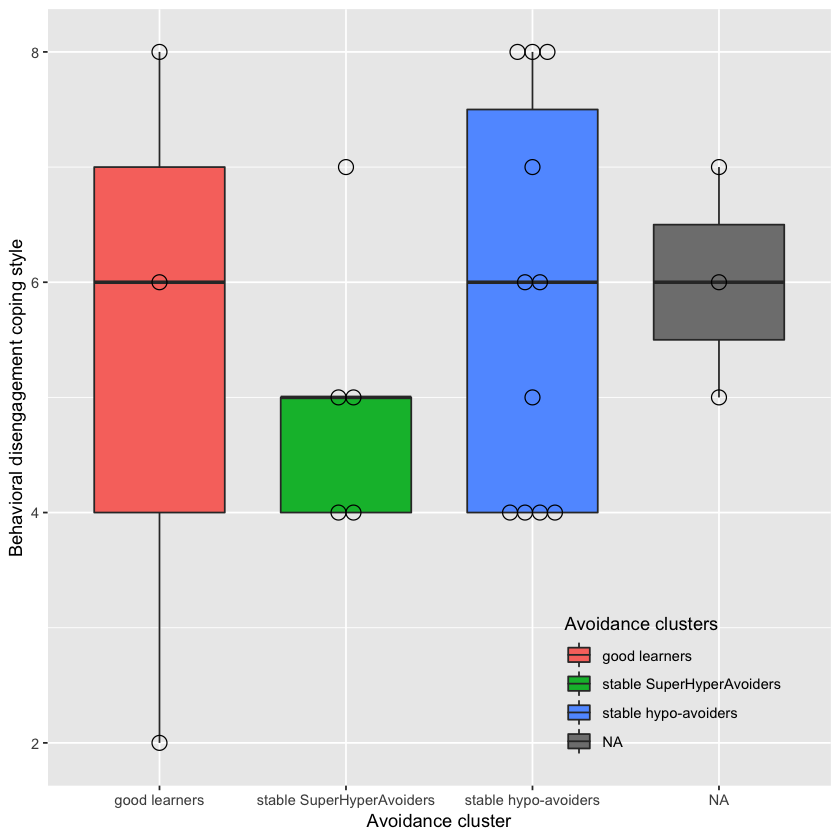

In [87]:
summary(aov(data$BehDis ~ data$Avoidance_clusters))
BehDisBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, BehDis,
                                    fill=Avoidance_clusters))
BehDisBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.13, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Behavioral disengagement coping style") + 
    theme(legend.position=c(0.8,0.13)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Use of emotional social support coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  105.6   52.82   4.694 0.0249 *
Residuals               16  180.1   11.25                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

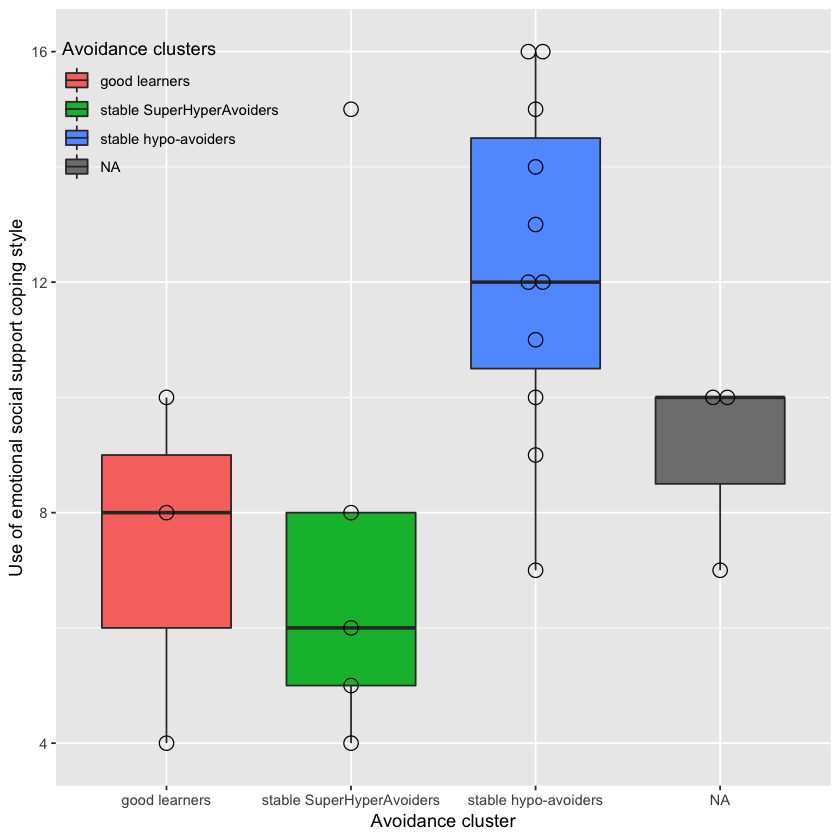

In [88]:
summary(aov(data$EmoSoc ~ data$Avoidance_clusters))
EmoSocBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, EmoSoc,
                                    fill=Avoidance_clusters))
EmoSocBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.25, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Use of emotional social support coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Substance use coping style

                        Df Sum Sq Mean Sq F value Pr(>F)
data$Avoidance_clusters  2  1.911  0.9557    0.84   0.45
Residuals               16 18.194  1.1371               
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

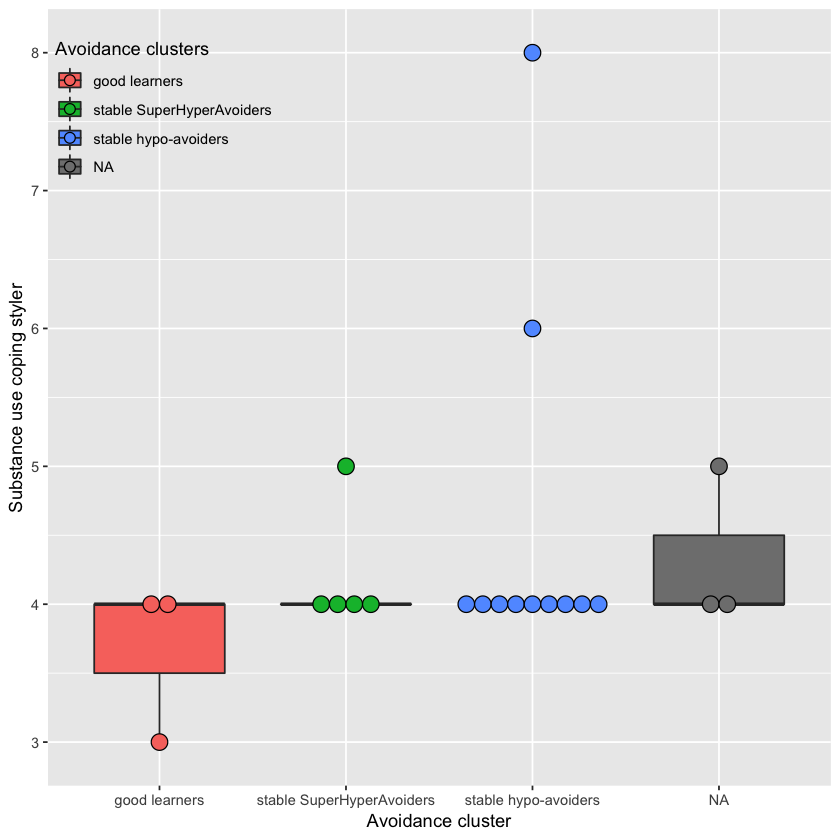

In [89]:
summary(aov(data$Subst ~ data$Avoidance_clusters))
SubstBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Subst,
                                    fill=Avoidance_clusters))
SubstBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.12, stackdir="center") +
    labs(x="Avoidance cluster", y="Substance use coping styler") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## Planning coping style

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  65.16   32.58    4.59 0.0266 *
Residuals               16 113.58    7.10                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

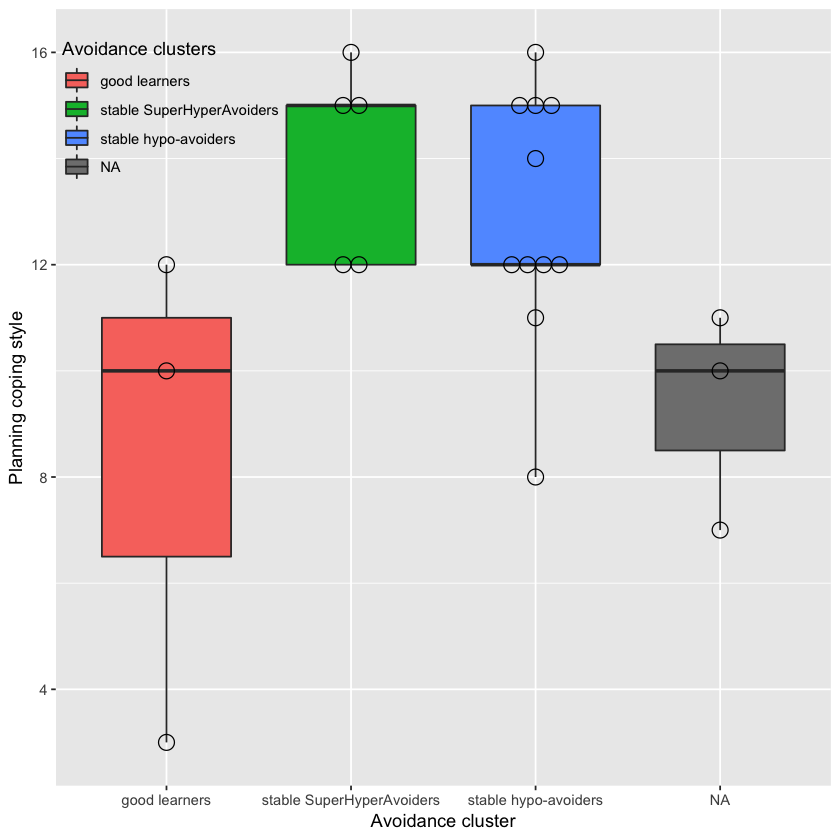

In [90]:
summary(aov(data$Plan ~ data$Avoidance_clusters))
PlanBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, Plan,
                                    fill=Avoidance_clusters))
PlanBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.3, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="Planning coping style") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## PosTot

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2   2224  1111.8   5.941 0.0118 *
Residuals               16   2994   187.2                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

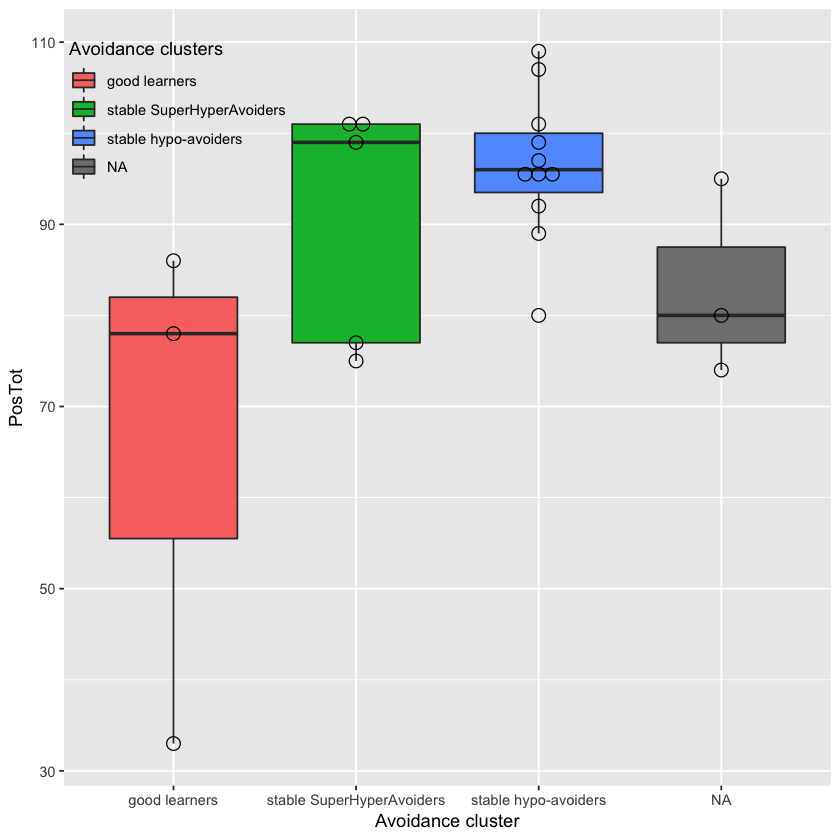

In [91]:
summary(aov(data$PosTot ~ data$Avoidance_clusters))
PosTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, PosTot,
                                    fill=Avoidance_clusters))
PosTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=1.5, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="PosTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item

## NegTot

                        Df Sum Sq Mean Sq F value Pr(>F)  
data$Avoidance_clusters  2  310.7  155.36   3.534 0.0536 .
Residuals               16  703.4   43.96                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
9 observations deleted due to missingness

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_bindot).”

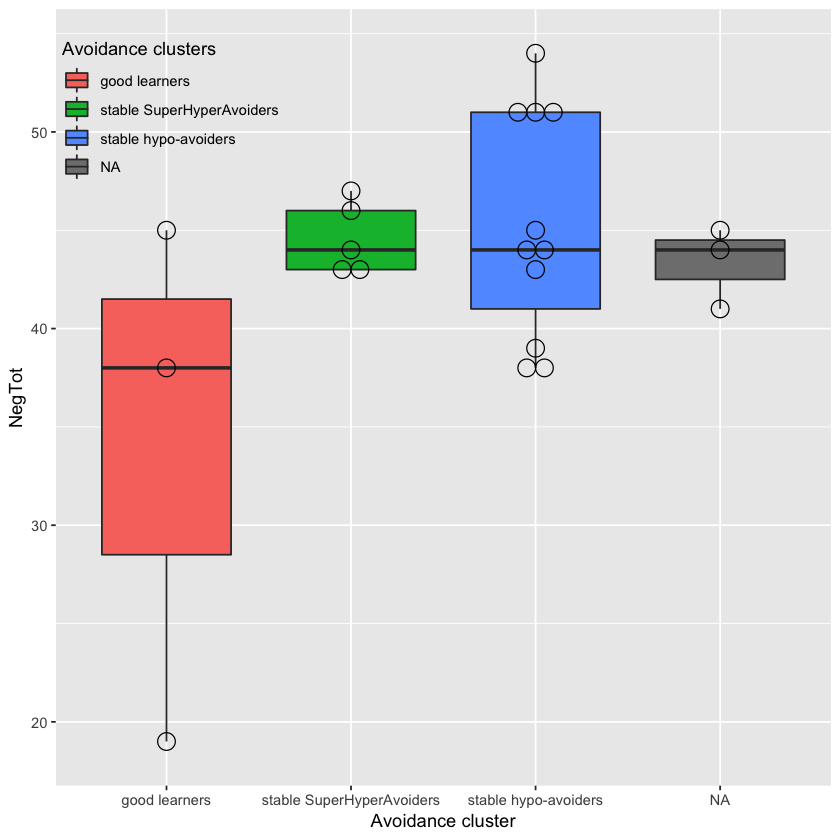

In [92]:
summary(aov(data$NegTot ~ data$Avoidance_clusters))
NegTotBoxplot <- ggplot(data, aes(group=Avoidance_clusters, 
                                     Avoidance_clusters, NegTot,
                                    fill=Avoidance_clusters))
NegTotBoxplot + 
    geom_boxplot(outlier.colour=NA, width=.7) + 
    geom_dotplot(binaxis="y", binwidth=.9, stackdir="center", fill="NA") +
    labs(x="Avoidance cluster", y="NegTot") + 
    theme(legend.position=c(0.15,0.87)) + labs(fill="Avoidance clusters") +
    theme(legend.background=element_blank()) + # Remove overall border 
    theme(legend.key=element_blank()) # Remove border around each item